In [1]:
# importing all the required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# read the dataset
df = pd.read_csv("Dataset_spine.csv")

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
columns = df["Unnamed: 13"].values[5:17]
columns

array(['Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)'], dtype=object)

In [5]:
del df["Unnamed: 13"]

In [6]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [8]:
df.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

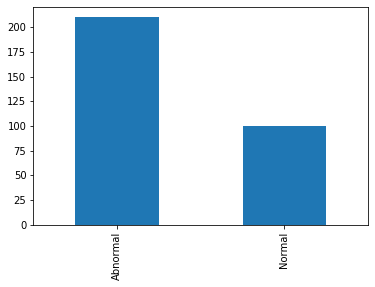

In [9]:
# see how many patient having back pain or not
df["Class_att"].value_counts().plot.bar()

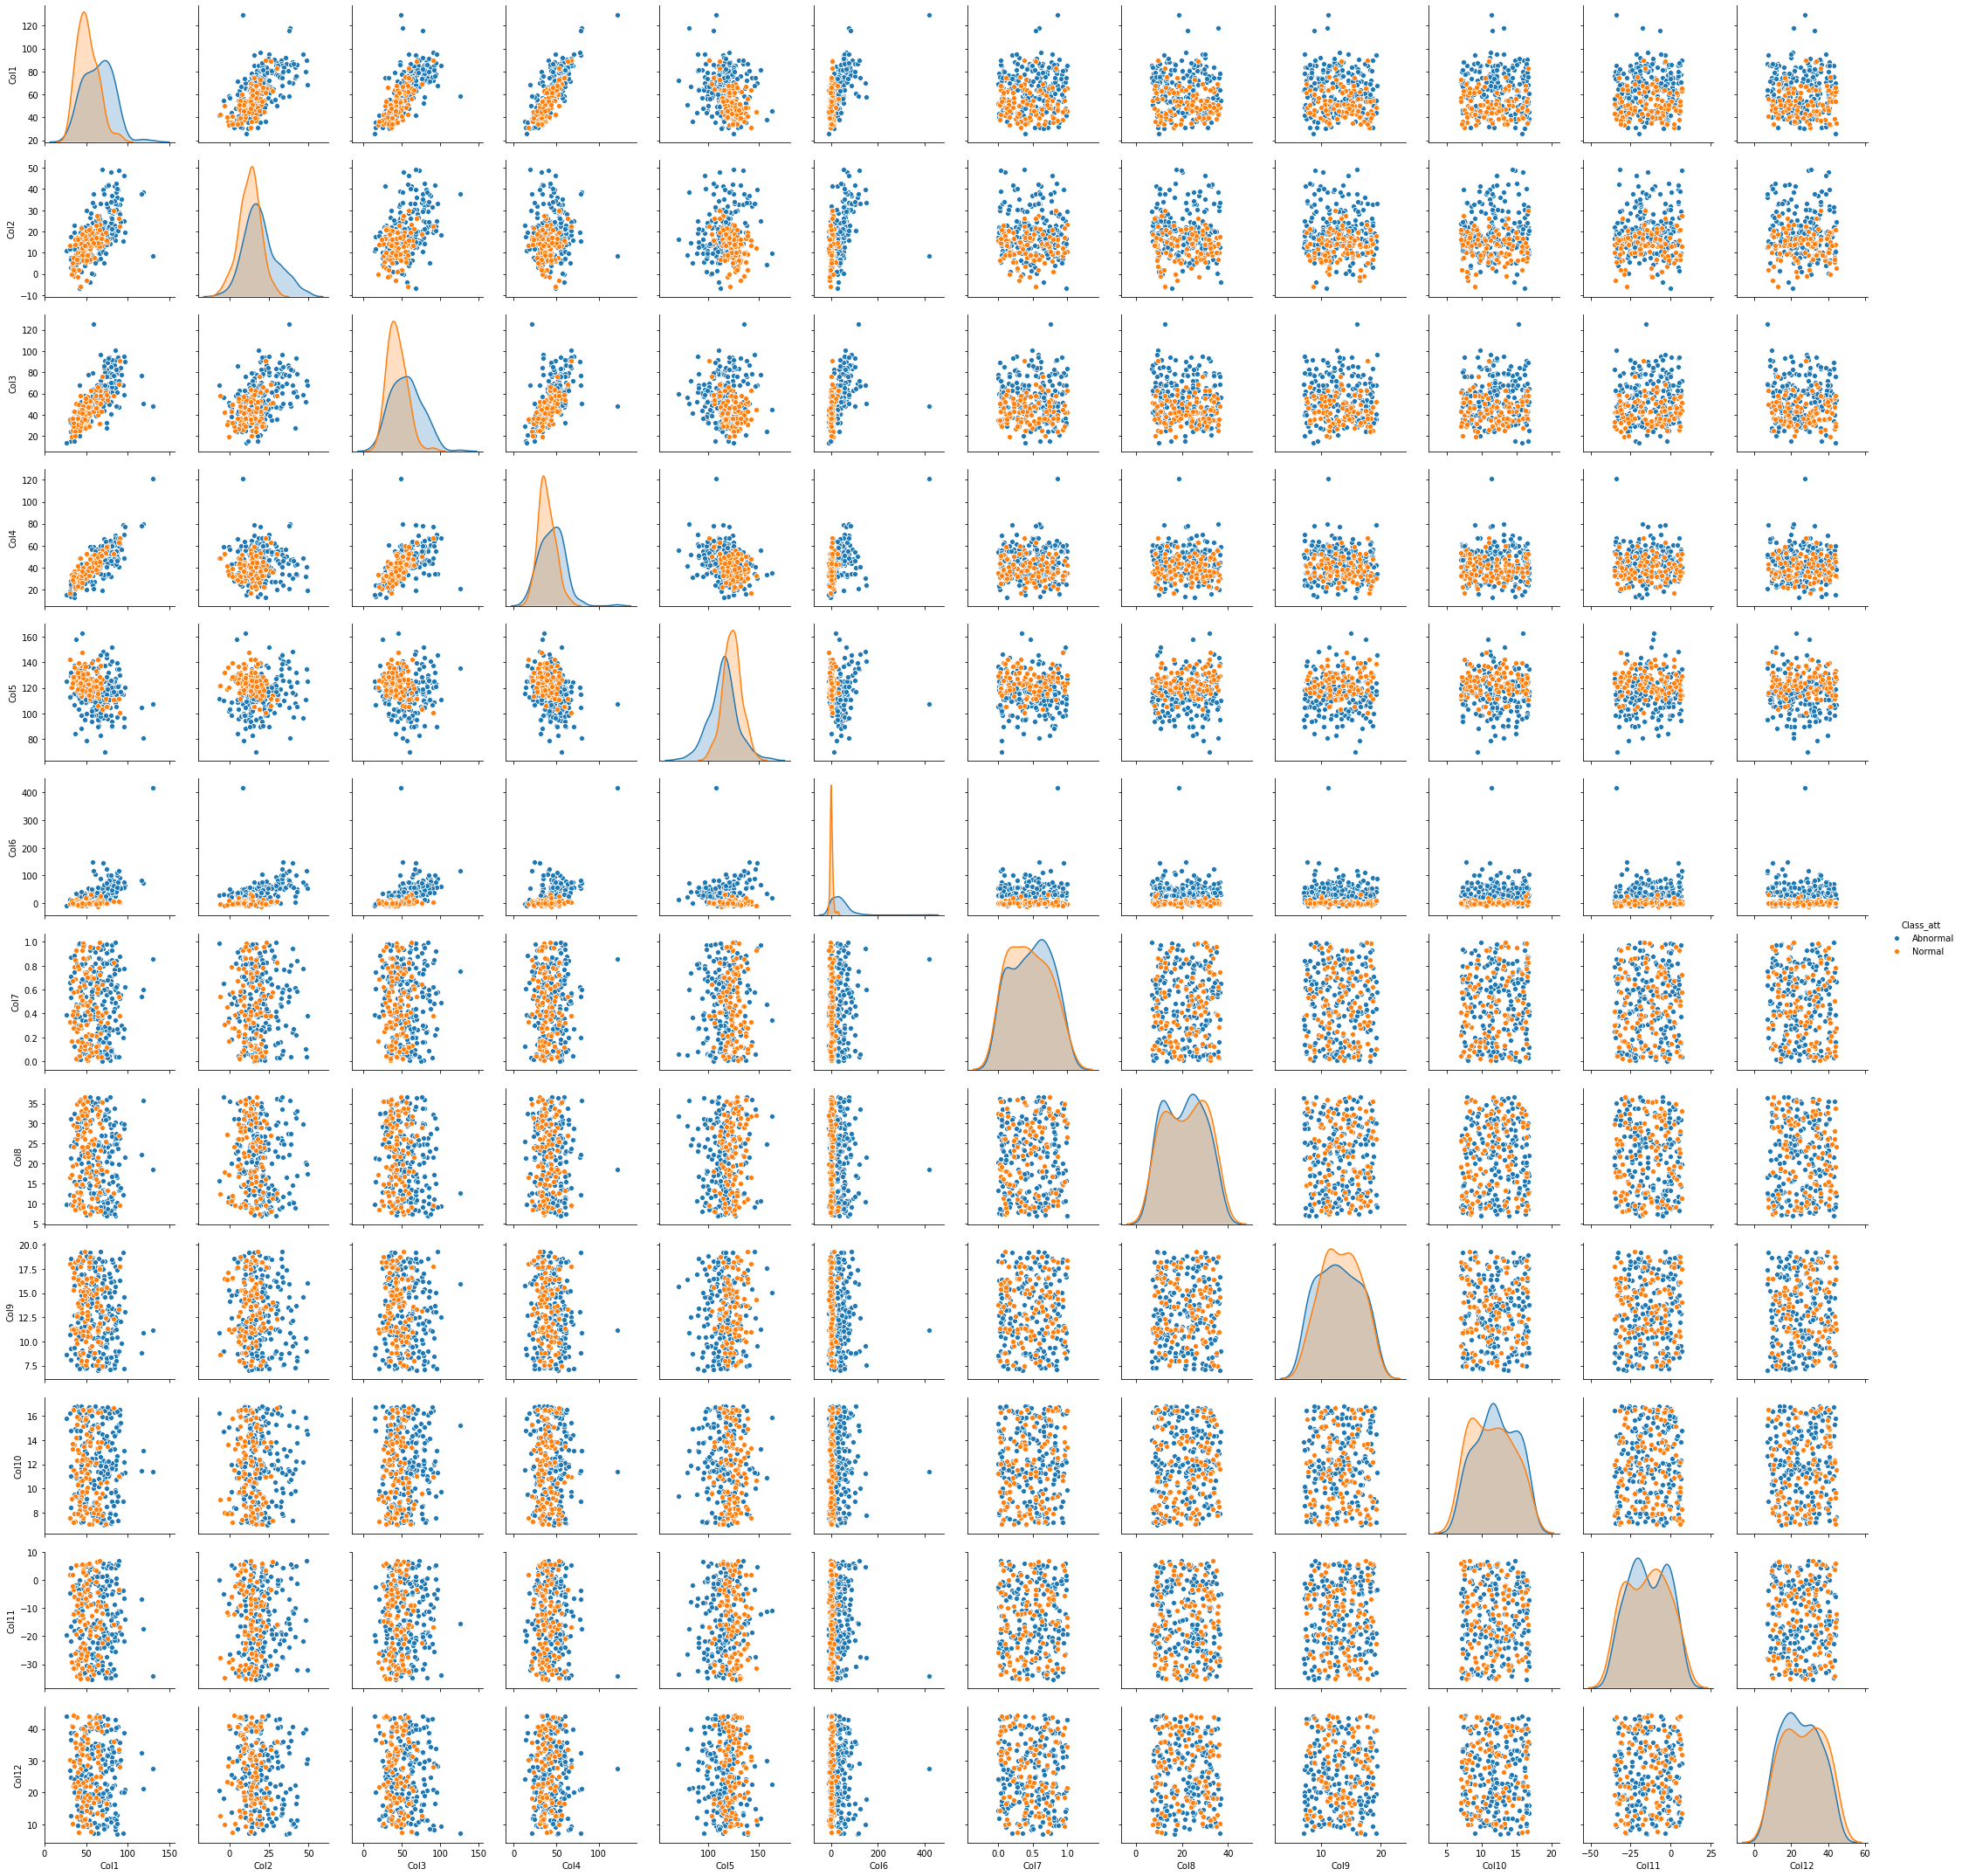

In [10]:
sns.pairplot(df,hue = "Class_att")

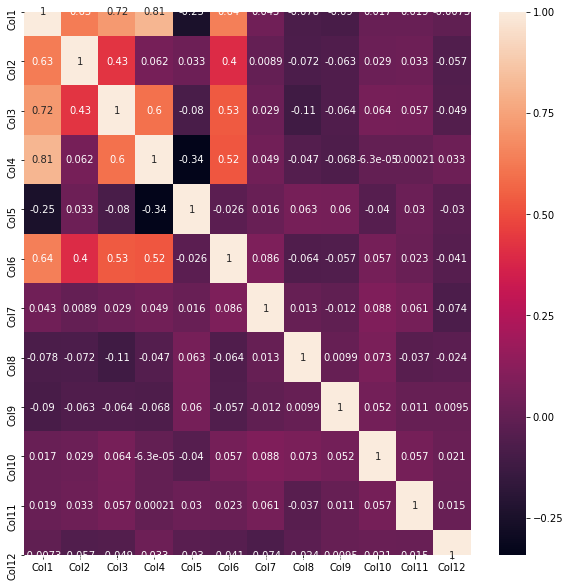

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

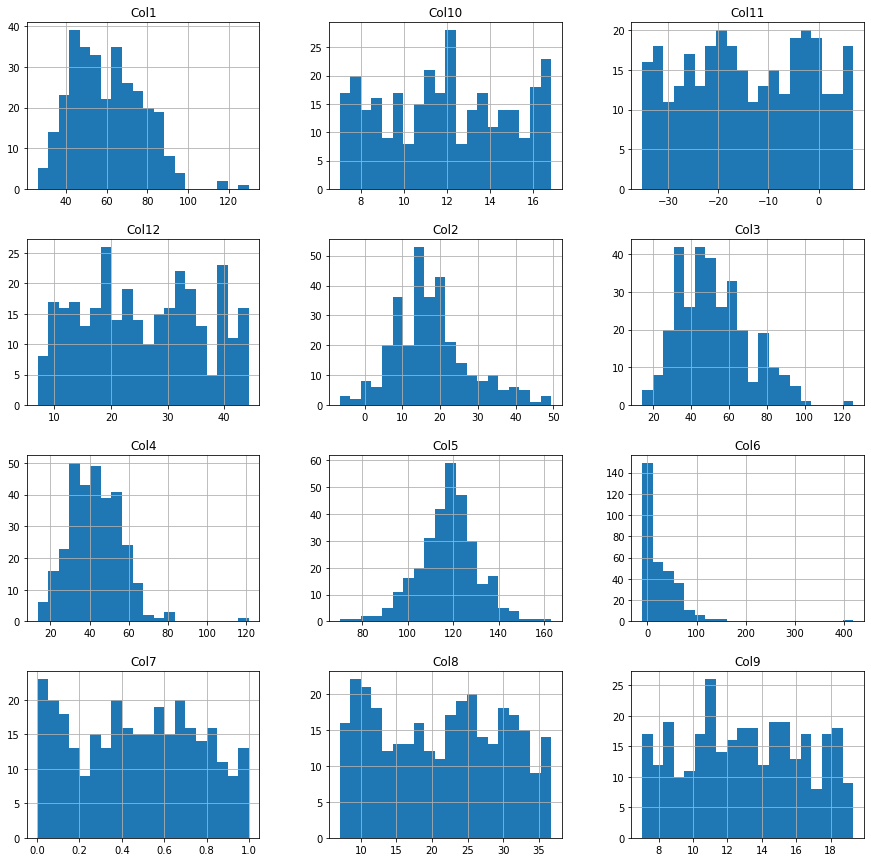

<Figure size 432x288 with 0 Axes>

In [12]:
df.hist(bins = 20 , figsize = (15,15))
plt.show()
plt.savefig("hist.png")

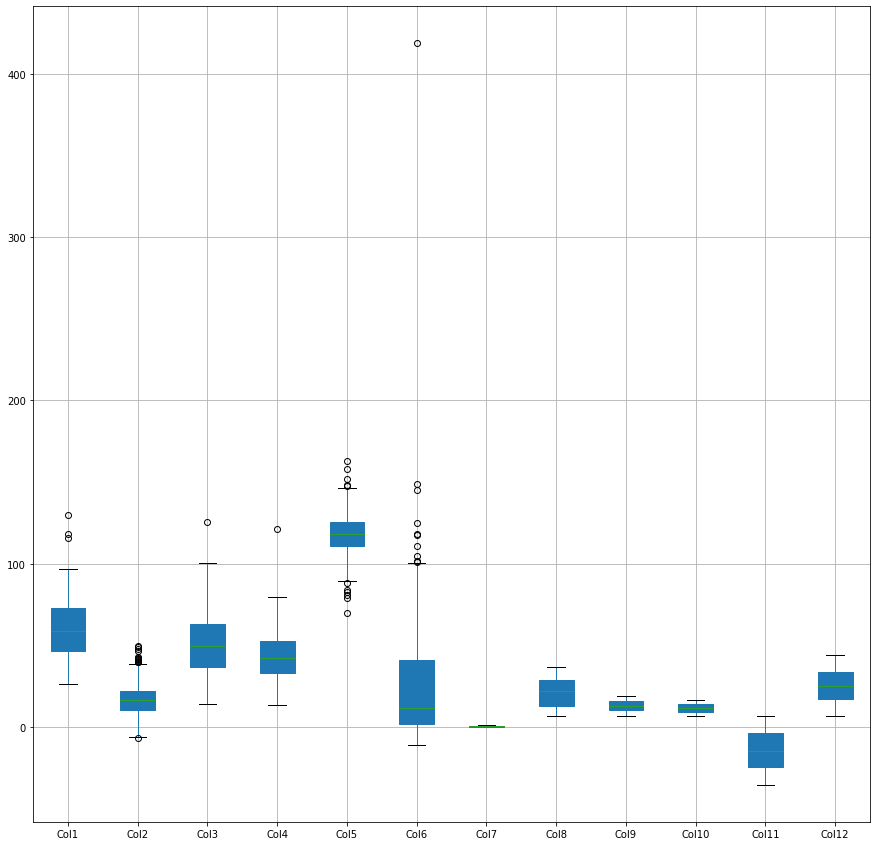

In [13]:
df.boxplot(patch_artist = True , figsize = (15,15))

In [14]:
data = df.drop("Class_att" , axis = 1)
label = df["Class_att"]

In [15]:
# make an function that removes the outliers(outliers fill with median value)
def is_outliers(dataset,feature):
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    IQR = q3-q1
    first_outliers = q1 - IQR*1.5
    last_outliers = q3 + IQR*1.5
    if (np.max(dataset[feature]) > last_outliers or np.min(dataset[feature]) < first_outliers):
        return True
    else:
        return False
    
    
def remove_outliers(dataset,feature):
    if (is_outliers(dataset,feature)):
        q1 = dataset[feature].quantile(0.25)
        q3 = dataset[feature].quantile(0.75)
        IQR = q3-q1
        first_outliers = q1 - IQR*1.5
        last_outliers = q3 + IQR*1.5
        med = np.median(dataset[feature])
        dataset.loc[dataset[feature] < first_outliers,feature] = med
        dataset.loc[dataset[feature] > last_outliers,feature] = med
        return dataset
    return dataset

In [16]:
for col in data.columns:
    data = remove_outliers(data,col)

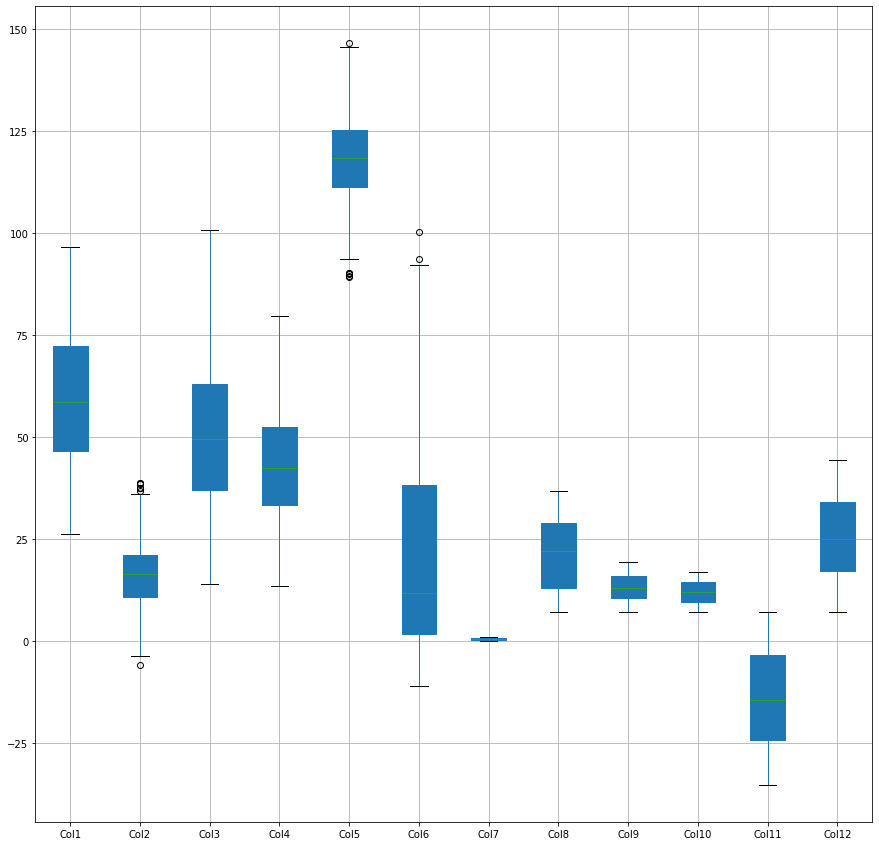

In [17]:
data.boxplot(patch_artist = True , figsize = (15,15))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data,label , test_size = 0.2 , random_state = 20)
x_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
131,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,0.668563,24.2342,8.7164,7.96714,-15.682309,34.9060
240,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538,0.098119,10.0549,8.7771,8.64451,-5.079724,29.4263
72,84.974132,33.021175,60.859873,51.952957,125.659534,74.333409,0.600116,25.6364,17.7501,7.88600,4.442569,13.4605
90,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180
196,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0.276928,24.5529,10.4232,14.97470,-22.286220,21.7822


In [19]:
# Normalize the data with MinMaxScaler and encoded the labeled data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

mms = MinMaxScaler()
scaled_data = mms.fit_transform(x_train)
x_train = pd.DataFrame(scaled_data,columns=data.columns)

scaled_data = mms.fit_transform(x_test)
x_test = pd.DataFrame(scaled_data,columns = data.columns)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [20]:
x_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,0.618827,0.412542,0.507238,0.642812,0.518263,0.260195,0.668279,0.579038,0.136625,0.092660,0.463922,0.747271
1,0.219815,0.296290,0.253988,0.293155,0.476703,0.044936,0.095318,0.101892,0.141565,0.162076,0.714814,0.600493
2,0.834303,0.865222,0.540207,0.581744,0.635986,0.766874,0.599530,0.626223,0.871897,0.084345,0.940144,0.172838
3,0.787244,0.764722,0.509922,0.596130,0.445469,0.374200,0.833252,0.543600,0.342767,0.474198,0.243171,0.399378
4,0.533609,0.388687,0.592092,0.567512,0.009013,0.602186,0.274916,0.589762,0.275545,0.810785,0.307651,0.395741


In [21]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1])

In [22]:
# testing the accuracy on different learning

diff_ml_algo = {"LogisticRegression" : LogisticRegression(),
               "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors = 7),
               "DecisionTreeClassifier" : DecisionTreeClassifier(),
               "RandomForestClassifier" : RandomForestClassifier()}

for key,value in diff_ml_algo.items():
    clf = value
    clf.fit(x_train,y_train)
    print (f"{key} accuracy")
    print (f"Accuracy on training data {clf.score(x_train,y_train) * 100} %")
    print (f"Accuracy on test data {clf.score(x_test,y_test) * 100} %")
    print ("---------------------------------------------------------------------------------------------")

LogisticRegression accuracy
Accuracy on training data 83.06451612903226 %
Accuracy on test data 79.03225806451613 %
---------------------------------------------------------------------------------------------
KNeighborsClassifier accuracy
Accuracy on training data 84.67741935483872 %
Accuracy on test data 69.35483870967742 %
---------------------------------------------------------------------------------------------
DecisionTreeClassifier accuracy
Accuracy on training data 100.0 %
Accuracy on test data 77.41935483870968 %
---------------------------------------------------------------------------------------------
RandomForestClassifier accuracy
Accuracy on training data 100.0 %
Accuracy on test data 79.03225806451613 %
---------------------------------------------------------------------------------------------


In [23]:
# so best accuracy in random forest classifier so we used Random forest algorithm
from sklearn.metrics import roc_curve,confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y_pred = rfc.predict(x_test)

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred = lr.predict(x_test)

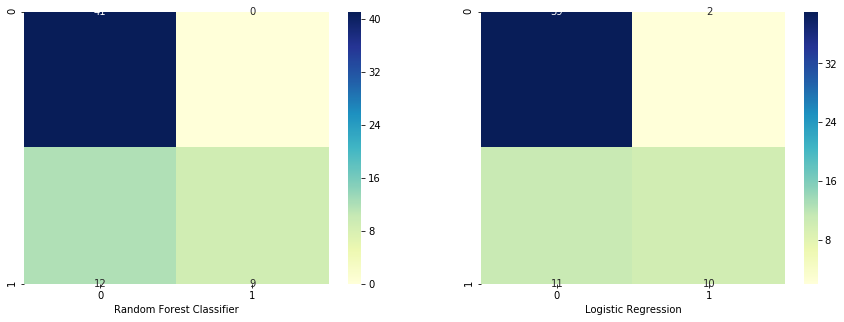

In [24]:
# Accuracy check usinf confusion matrix
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,rfc_y_pred) , annot  = True , cmap="YlGnBu")
plt.xlabel ("Random Forest Classifier")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,lr_y_pred) , annot  = True , cmap="YlGnBu")
plt.xlabel ("Logistic Regression")
plt.show()

No handles with labels found to put in legend.


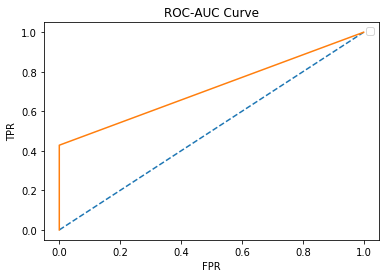

In [30]:
# ROC-AUC Curve
plt.plot([0,1],[0,1],"--")

fpr,tpr,thresold = roc_curve(y_test,rfc_y_pred)
plt.plot(fpr,tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("ROC-AUC Curve")
plt.show()